In [1]:
import pandas as pd 
import numpy as np


In [2]:
df = pd.read_csv('ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
movie_title = pd.read_csv('movies.csv')
# movie_title.movieId.astype(object)
df = pd.merge(movie_title, df, on = 'movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [4]:
df.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [5]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [6]:
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


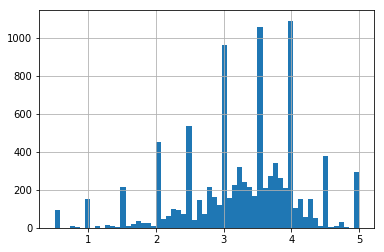

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=60)


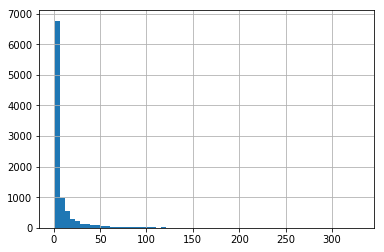

In [8]:
ratings['number_of_ratings'].hist(bins=60)

C:\Users\computer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\computer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\computer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


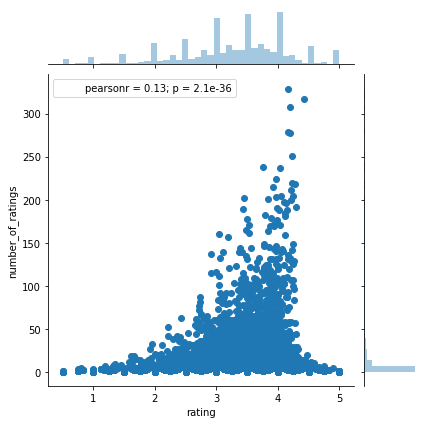

In [9]:
import seaborn as sns
sns.jointplot(x='rating', y = 'number_of_ratings', data= ratings)

In [10]:
movie_matrix = df.pivot_table(index = 'userId', columns = 'title', values = 'rating')
movie_matrix.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [11]:
ratings.sort_values('number_of_ratings', ascending = False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [12]:
afo_movie_rating = movie_matrix['Air Force One (1997)']
contact_movie_rating = movie_matrix['Contact (1997)']

similar_to_air_force_one = movie_matrix.corrwith(afo_movie_rating)
similar_to_contact = movie_matrix.corrwith(contact_movie_rating)

similar_to_contact.head(10)

C:\Users\computer\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\computer\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Salem's Lot (2004)                             NaN
'Til There Was You (1997)                       NaN
'Tis the Season for Love (2015)                 NaN
'burbs, The (1989)                         0.486761
'night Mother (1986)                            NaN
(500) Days of Summer (2009)                0.634064
*batteries not included (1987)             0.868599
dtype: float64

In [13]:
corr_contact = pd.DataFrame(similar_to_contact, columns = ['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,Correlation
title,
"'burbs, The (1989)",0.486761
(500) Days of Summer (2009),0.634064
*batteries not included (1987),0.868599
...And Justice for All (1979),1.000000
10 Things I Hate About You (1999),-0.102640


In [14]:
corr_air_force = pd.DataFrame(similar_to_air_force_one, columns = ['Correlation'])
corr_air_force.dropna(inplace = True)
corr_air_force.head()

,Correlation
title,
"'burbs, The (1989)",0.168459
(500) Days of Summer (2009),0.086874
*batteries not included (1987),-0.866025
10 Cloverfield Lane (2016),0.192450
10 Items or Less (2006),-1.000000


In [15]:
corr_air_force['number_of_ratings'] = ratings['number_of_ratings']
corr_contact['number_of_ratings'] = ratings['number_of_ratings']
corr_air_force.head()
# corr_contact.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.168459,17
(500) Days of Summer (2009),0.086874,42
*batteries not included (1987),-0.866025,7
10 Cloverfield Lane (2016),0.192450,14
10 Items or Less (2006),-1.000000,3


In [16]:
corr_air_force[corr_air_force['number_of_ratings']>100].sort_values(by = 'Correlation', ascending=False).head()


,Correlation,number_of_ratings
title,,
Clear and Present Danger (1994),0.698836,110
"Net, The (1995)",0.598322,112
"Green Mile, The (1999)",0.574799,111
"Firm, The (1993)",0.561304,101
"Departed, The (2006)",0.543279,107


In [17]:
corr_contact[corr_contact['number_of_ratings']>100].sort_values(by= 'Correlation', ascending=False).head()


,Correlation,number_of_ratings
title,,
Sleepless in Seattle (1993),0.689602,106
American Pie (1999),0.670109,103
Clear and Present Danger (1994),0.641203,110
"Firm, The (1993)",0.640332,101
"Bourne Identity, The (2002)",0.639769,112
